# Nagy mennyiséfű adatfeldolgozás beadandó

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

## A) Adatvizualizálás és klasszterezés

### A/1: adatok általános bemutatása

In [352]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')
df = pd.read_csv('data_33.csv', na_values = ['?'])
df.head(1125)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,6393,7,22.0,56.0,3000.0,169.6974,0.004626,0.000517,6,0.000120,0.000397,0.006112,25.5613,35.2326,4.3308,30,0.001357,7,0.000323,0.000443
1,6395,2,25.0,8.0,100.0,70.5000,0.000823,0.000131,3,0.000009,0.000103,0.002591,52.8116,81.6606,4.9639,24,0.000702,8,0.000000,0.000000
2,6397,5,20.0,42.0,1500.0,130.7160,0.004728,0.000450,5,0.000323,0.000950,0.004562,33.7462,50.4549,4.3047,23,0.000901,7,0.000117,0.000597
3,6402,5,26.0,8.0,730.0,62.2680,0.001741,0.000245,3,0.000074,0.000172,0.002207,36.5810,81.8222,4.3167,10,0.000858,6,0.000110,0.000172
4,6407,3,26.0,40.0,400.0,69.1740,0.002361,0.000405,0,0.000000,0.000236,0.001821,53.8868,111.8519,5.7222,8,0.000843,4,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,10089,8,NaN,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
1120,10090,8,NaN,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
1121,10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
1122,10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [86]:
df.shape

(1124, 20)

In [87]:
df.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                1124 non-null   int64  
 1   LeagueIndex           1124 non-null   int64  
 2   Age                   1069 non-null   float64
 3   HoursPerWeek          1069 non-null   float64
 4   TotalHours            1069 non-null   float64
 5   APM                   1124 non-null   float64
 6   SelectByHotkeys       1124 non-null   float64
 7   AssignToHotkeys       1124 non-null   float64
 8   UniqueHotkeys         1124 non-null   int64  
 9   MinimapAttacks        1124 non-null   float64
 10  MinimapRightClicks    1124 non-null   float64
 11  NumberOfPACs          1124 non-null   float64
 12  GapBetweenPACs        1124 non-null   float64
 13  ActionLatency         1124 non-null   float64
 14  ActionsInPAC          1124 non-null   float64
 15  TotalMapExplored     

### A/2: hiányzó adatok, extrém értékek feltérképezése, kezelése  

In [353]:
missing_data = df.isnull().sum()
print(missing_data)

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            55
TotalHours              55
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64


In [354]:
df_tiszta = df.dropna()
df_feltoltott = df.fillna(df.median())
print(df_feltoltott.head(1125))

      GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0       6393            7  22.0          56.0      3000.0  169.6974   
1       6395            2  25.0           8.0       100.0   70.5000   
2       6397            5  20.0          42.0      1500.0  130.7160   
3       6402            5  26.0           8.0       730.0   62.2680   
4       6407            3  26.0          40.0       400.0   69.1740   
...      ...          ...   ...           ...         ...       ...   
1119   10089            8  22.0          12.0       600.0  259.6296   
1120   10090            8  22.0          12.0       600.0  314.6700   
1121   10092            8  22.0          12.0       600.0  299.4282   
1122   10094            8  22.0          12.0       600.0  375.8664   
1123   10095            8  22.0          12.0       600.0  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.004626         0.000517              6        0.000120   
1

In [356]:
missing_datas = df_feltoltott.isnull().sum()
print(missing_datas)

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64


In [60]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,1124.000000,1124.000000,1069.000000,1069.000000,1069.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,7927.694840,4.379893,22.197381,15.792329,681.110384,127.145394,0.005298,0.000407,4.648577,0.000112,0.000411,0.003563,38.019777,61.719400,5.401313,22.562278,0.001027,6.602313,0.000061,0.000155
std,947.220599,1.605530,4.317388,11.181759,400.624642,59.616922,0.006624,0.000261,2.362174,0.000167,0.000407,0.001028,16.252112,19.247783,1.565504,7.754276,0.000506,1.853791,0.000112,0.000305
min,6393.000000,1.000000,16.000000,2.000000,600.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000861,8.164200,24.093600,2.471600,5.000000,0.000194,2.000000,0.000000,0.000000
25%,7127.750000,3.000000,19.000000,8.000000,600.000000,86.933550,0.001436,0.000212,3.000000,0.000007,0.000151,0.002858,27.363775,48.555300,4.362375,17.000000,0.000690,5.000000,0.000000,0.000000
50%,7895.500000,4.000000,22.000000,12.000000,600.000000,115.925700,0.002911,0.000380,5.000000,0.000048,0.000298,0.003503,35.307200,58.842900,5.225700,22.000000,0.000906,7.000000,0.000000,0.000020
75%,8630.500000,5.000000,25.000000,20.000000,600.000000,153.219750,0.006079,0.000534,6.000000,0.000141,0.000542,0.004149,45.202000,70.954625,6.116400,27.000000,0.001230,8.000000,0.000095,0.000184
max,10095.000000,8.000000,41.000000,96.000000,6000.000000,375.866400,0.043088,0.001752,10.000000,0.001242,0.004041,0.007780,160.953500,168.924900,18.558100,56.000000,0.004307,12.000000,0.000786,0.003084


In [275]:
def cserel(df):
    for oszlop in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_feltoltott[oszlop].quantile(0.25)
        Q3 = df_feltoltott[oszlop].quantile(0.75)
        IQR = Q3 - Q1
        also_hatóérték = Q1 - 1.5 * IQR
        felso_hatóérték = Q3 + 1.5 * IQR

        medián = df_feltoltott[oszlop].median()

        df_feltoltott[oszlop] = df_feltoltott[oszlop].apply(lambda x: medián if x < also_hatóérték or x > felso_hatóérték else x)

    return df_feltoltott
dfs = cserel(df_feltoltott)
df_feltoltott[:] = dfs
dfs.head(1125)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,6393,7,22.0,12.0,600.0,169.6974,0.004626,0.000517,6,0.000120,0.000397,0.003503,25.5613,35.2326,4.3308,30.0,0.001357,7,0.0,0.000020
1,6395,2,25.0,8.0,100.0,70.5000,0.000823,0.000131,3,0.000009,0.000103,0.002591,52.8116,81.6606,4.9639,24.0,0.000702,8,0.0,0.000000
2,6397,5,20.0,12.0,600.0,130.7160,0.004728,0.000450,5,0.000048,0.000298,0.004562,33.7462,50.4549,4.3047,23.0,0.000901,7,0.0,0.000020
3,6402,5,26.0,8.0,730.0,62.2680,0.001741,0.000245,3,0.000074,0.000172,0.002207,36.5810,81.8222,4.3167,10.0,0.000858,6,0.0,0.000172
4,6407,3,26.0,12.0,400.0,69.1740,0.002361,0.000405,0,0.000000,0.000236,0.001821,53.8868,58.8429,5.7222,8.0,0.000843,4,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,10089,8,22.0,12.0,600.0,115.9257,0.002911,0.000743,9,0.000048,0.000146,0.004555,18.6059,42.8342,6.2754,22.0,0.000877,5,0.0,0.000000
1120,10090,8,22.0,12.0,600.0,115.9257,0.002911,0.000380,10,0.000048,0.000298,0.004259,14.3023,36.1156,7.1965,16.0,0.000788,4,0.0,0.000000
1121,10092,8,22.0,12.0,600.0,115.9257,0.002911,0.000860,7,0.000048,0.000169,0.004439,12.4028,39.5156,6.3979,19.0,0.001260,4,0.0,0.000000
1122,10094,8,22.0,12.0,600.0,115.9257,0.002911,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15.0,0.000613,6,0.0,0.000020


### A/3: Vizualizációk

1: Különböző ligák életkora

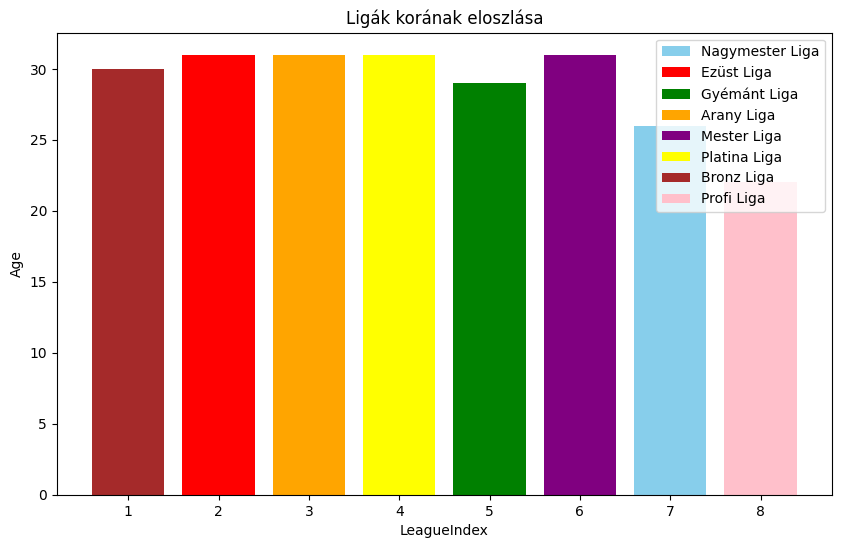

In [276]:
available_colors = ['skyblue', 'red', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink']

liga_nevek = {
    1: 'Bronz Liga',
    2: 'Ezüst Liga',
    3: 'Arany Liga',
    4: 'Platina Liga',
    5: 'Gyémánt Liga',
    6: 'Mester Liga',
    7: 'Nagymester Liga',
    8: 'Profi Liga'
}

unique_positions = dfs['LeagueIndex'].unique()

plt.figure(figsize=(10, 6))

color_index = 0

for position in unique_positions:
    subset = dfs[dfs['LeagueIndex'] == position]
    plt.bar(subset['LeagueIndex'], subset['Age'], color=available_colors[color_index], label=liga_nevek[position])
    color_index = (color_index + 1) % len(available_colors)

plt.xlabel('LeagueIndex')
plt.ylabel('Age')
plt.title('Ligák korának eloszlása')
plt.legend()

plt.show()

2: Óra/hét és a percenként végrehajtott akciók oszlopba tartozó játékosok száma
Mennyi időt töltenek játékkal és a mozgás gyorsasága

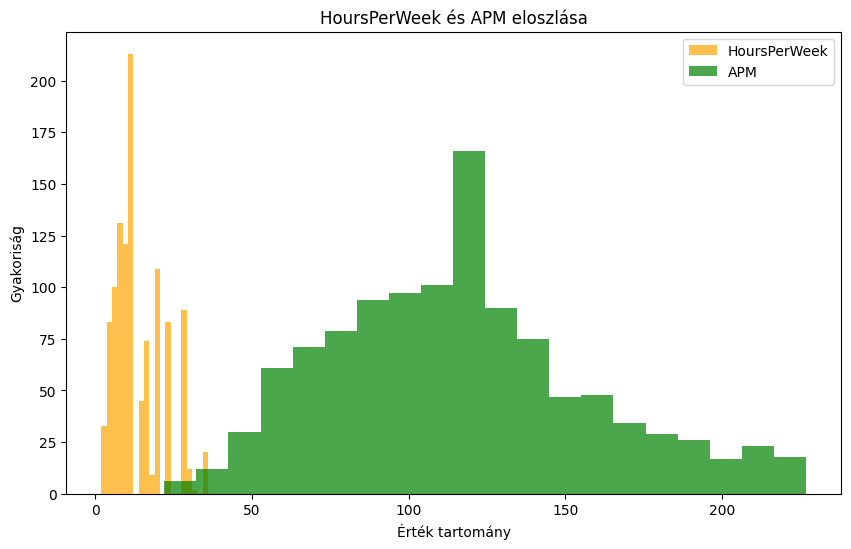

In [277]:
plt.figure(figsize=(10, 6))
plt.hist(dfs['HoursPerWeek'], bins=20, color='orange', alpha=0.7, label='HoursPerWeek')
plt.hist(dfs['APM'], bins=20, color='green', alpha=0.7, label='APM')
plt.xlabel('Érték tartomány')
plt.ylabel('Gyakoriság')
plt.title('HoursPerWeek és APM eloszlása')
plt.legend()
plt.show()

3: átlagosan végrehajtott akciók száma egy PAC-on belül, az extrém adatok kezelése után és előtt

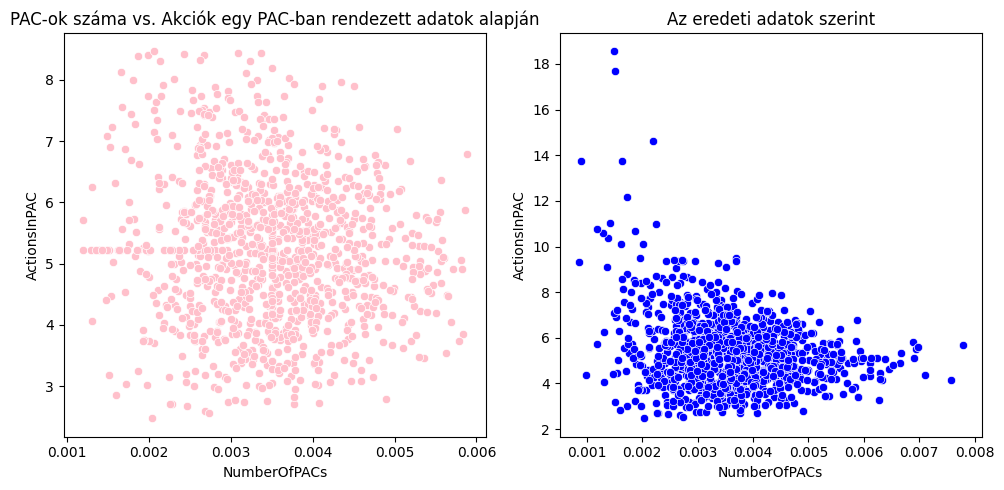

In [286]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=dfs, x='NumberOfPACs', y='ActionsInPAC', color='pink')
plt.title('PAC-ok száma vs. Akciók egy PAC-ban rendezett adatok alapján')
plt.subplot(1, 2, 2)

sns.scatterplot(data=df, x='NumberOfPACs', y='ActionsInPAC', color='blue')
plt.title('Az eredeti adatok szerint')
plt.tight_layout()

4: páros összehasonlítás, az átló a változók eloszlását mutatja

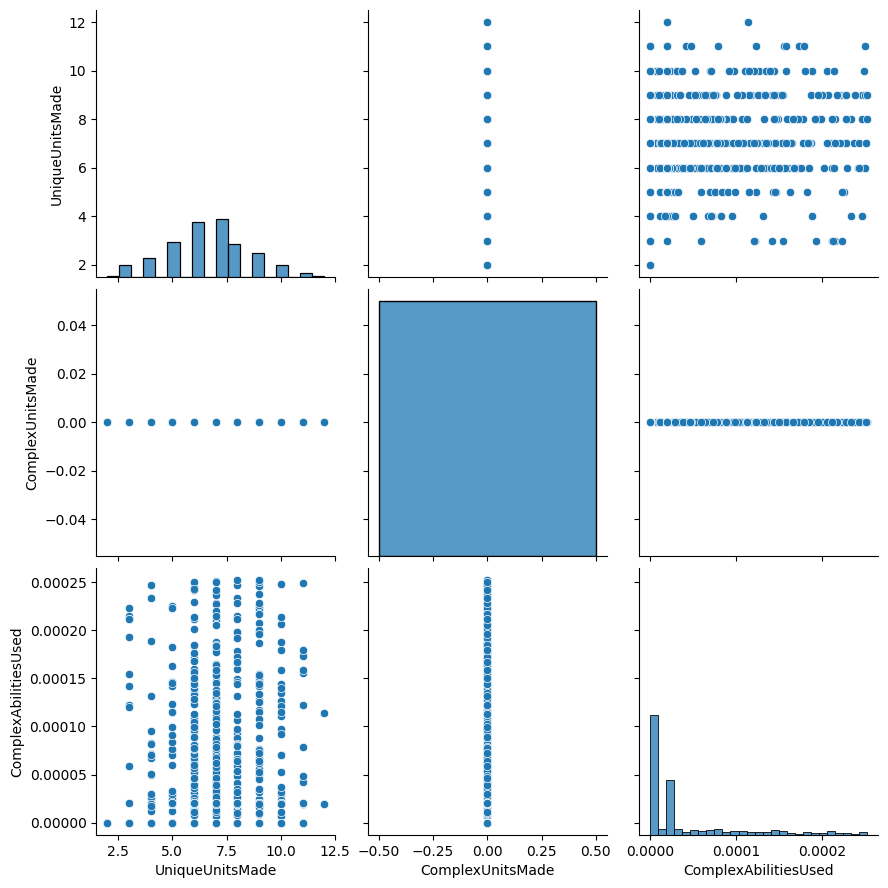

In [287]:
sns.pairplot(data=dfs[['UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']], height=3)
plt.show()

5: Gyorsbillenytű kiválasztásoknak a száma az átlagos támadási akciók függvényében

<ipython-input-289-f417a0edd4b6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='SelectByHotkeys',y='MinimapAttacks',estimator='mean',ci=None)


<Axes: xlabel='SelectByHotkeys', ylabel='MinimapAttacks'>

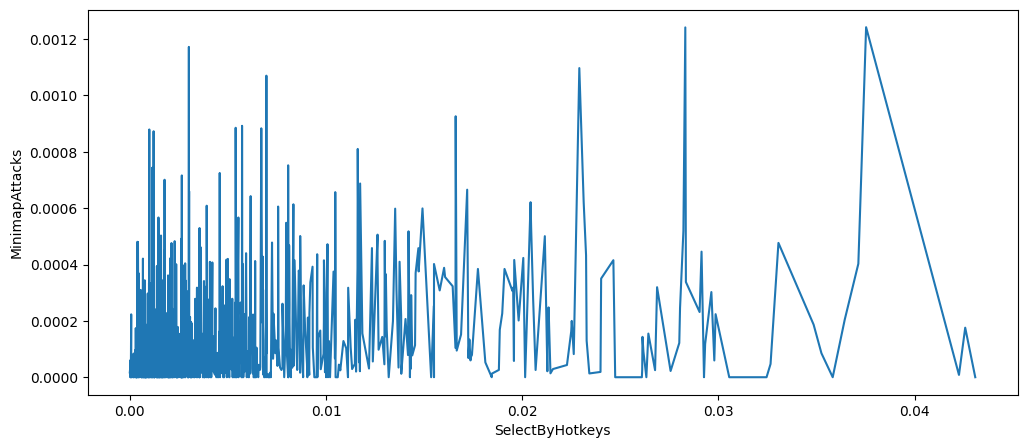

In [289]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='SelectByHotkeys',y='MinimapAttacks',estimator='mean',ci=None)

### A/4: Klaszterezés

1. **klaszter**

In [290]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dfs[['SelectByHotkeys','APM']]);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [291]:
kmeans.cluster_centers_

array([[4.11177037e-03, 2.00135779e+02],
       [1.08587954e-03, 5.98742610e+01],
       [3.22443653e-03, 1.21135644e+02],
       [4.64791354e-03, 1.56191001e+02],
       [2.06590923e-03, 9.16874606e+01]])

In [292]:
def plot_result(kmeans):
    plt.figure(figsize=(6,4))
    plt.title("Játékosok kattintásának gyorsasága")
    sns.scatterplot(x=dfs['SelectByHotkeys'], y=dfs['APM'], hue=kmeans.labels_, palette="Set1", marker='+');
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', s=100, c=['black']);

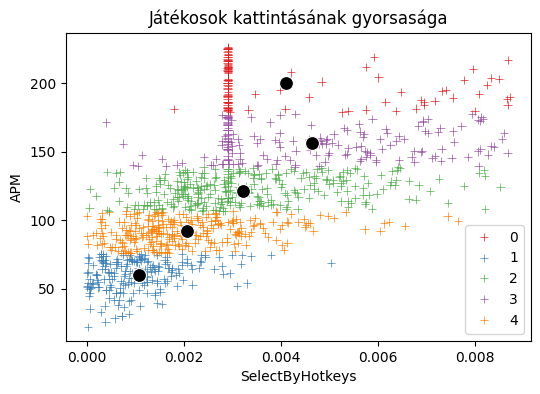

In [293]:
plot_result(kmeans)

2. **klaszter**

In [298]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['MinimapAttacks','ActionLatency']]);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [299]:
kmeans.cluster_centers_

array([[4.57577351e-05, 1.18399293e+02],
       [1.11221206e-04, 5.29733811e+01],
       [7.11798991e-05, 8.57926045e+01],
       [7.28167011e-05, 6.67042805e+01],
       [2.14938616e-04, 3.90715729e+01]])

In [300]:
def plot_result(kmeans):
    plt.figure(figsize=(6,4))
    plt.title("Támadási szokások az akció idő függvényében")
    sns.scatterplot(x=df['MinimapAttacks'], y=df['ActionLatency'], hue=kmeans.labels_, palette="Set1", marker='+');
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', s=100, c=['black']);

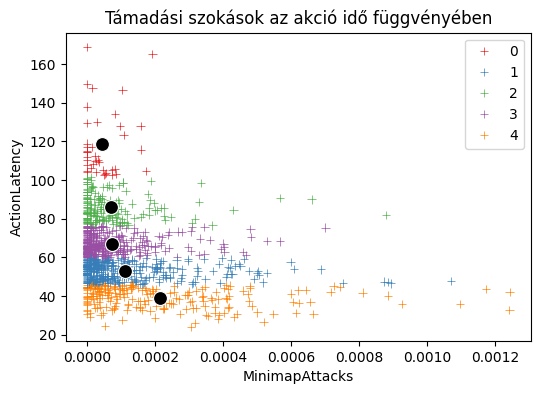

In [301]:
plot_result(kmeans)

## B) Lineáris regresszió

### B/1: Életkor hogyan befolyásolja az akciók számát percenként

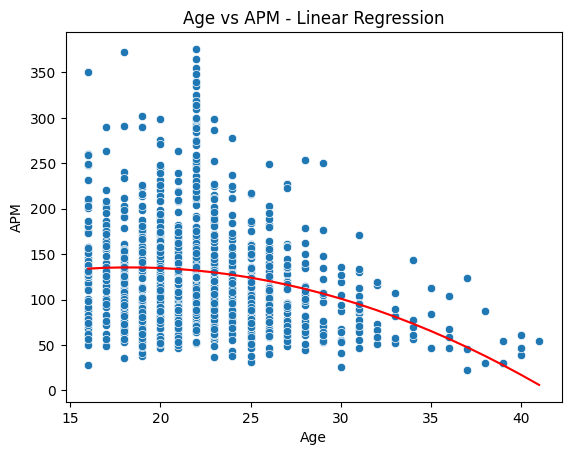

In [270]:
X = df_feltoltott[['Age']].to_numpy()
y = df_feltoltott['APM'].to_numpy()

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly, y)

h = reg.predict(X_poly)

sns.scatterplot(x=df_feltoltott['Age'], y=df_feltoltott['APM'])
sns.lineplot(x=df_feltoltott['Age'], y=h, color='red')
plt.xlabel('Age')
plt.ylabel('APM')
plt.title('Age vs APM - Lineáris Regresszió')
plt.show()

### B/2: Lineáris regresszió folytonos attribútumokra

1. **példa**

Coefficients: [18.49987749]
Intercept: 417.4335001018574
Mean squared error: 181276.6915519494
R2 score: 0.3090973909966849


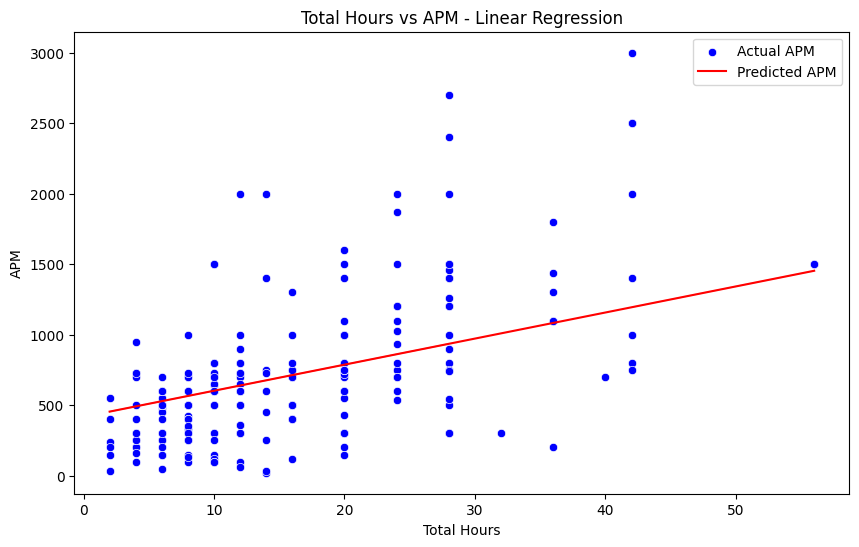

In [309]:
X = df_feltoltott[['HoursPerWeek']].to_numpy()
y = df_feltoltott['TotalHours'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual APM', color='blue')
sns.lineplot(x=X_test.flatten(), y=y_pred, label='Predicted APM', color='red')
plt.xlabel('Total Hours')
plt.ylabel('APM')
plt.title('Total Hours vs APM - Lineáris Regresszió')
plt.legend()
plt.show()

2. **példa**

Coefficients: [0.86102198]
Intercept: 29.15970372386201
Mean squared error: 168.00819419606296
R2 score: 0.4016141168938029


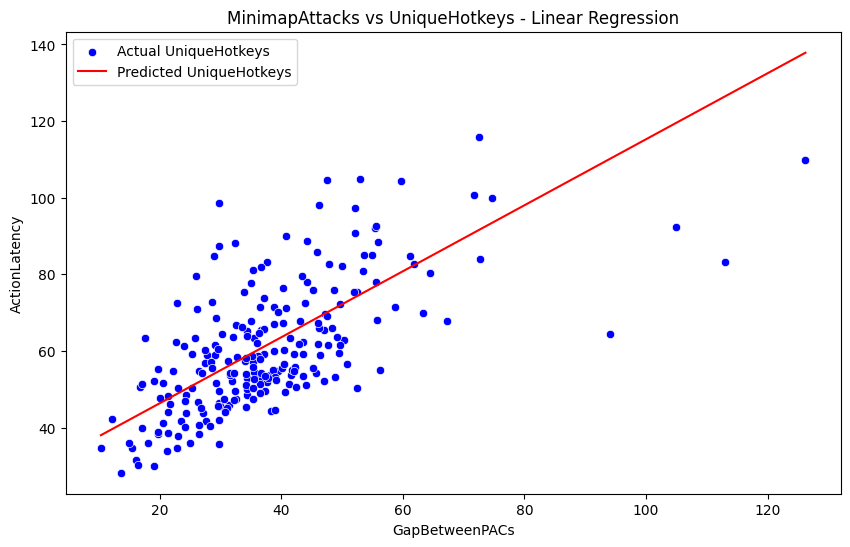

In [318]:
X = df_feltoltott[['GapBetweenPACs']].to_numpy()
y = df_feltoltott['ActionLatency'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual ActionLatenc', color='blue')
sns.lineplot(x=X_test.flatten(), y=y_pred, label='Predicted ActionLatenc', color='red')
plt.xlabel('GapBetweenPACs')
plt.ylabel('ActionLatency')
plt.title('GapBetweenPACs vs ActionLatency - Lineáris Regresszió')
plt.legend()
plt.show()

## C) Logisztikus regresszió

### C/1: Logisztikai regresszió a meglévő adatok alapján (B/2-1. feladat mintáján)

Accuracy: 0.9555555555555556
Confusion Matrix:
 [[215   0   0]
 [  4   0   0]
 [  6   0   0]]
Classification Report:
               precision    recall  f1-score   support

        High       0.96      1.00      0.98       215
         Low       0.00      0.00      0.00         4
      Medium       0.00      0.00      0.00         6

    accuracy                           0.96       225
   macro avg       0.32      0.33      0.33       225
weighted avg       0.91      0.96      0.93       225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-334-02b784f9540f>:28: UserWarning: Ignoring `pale

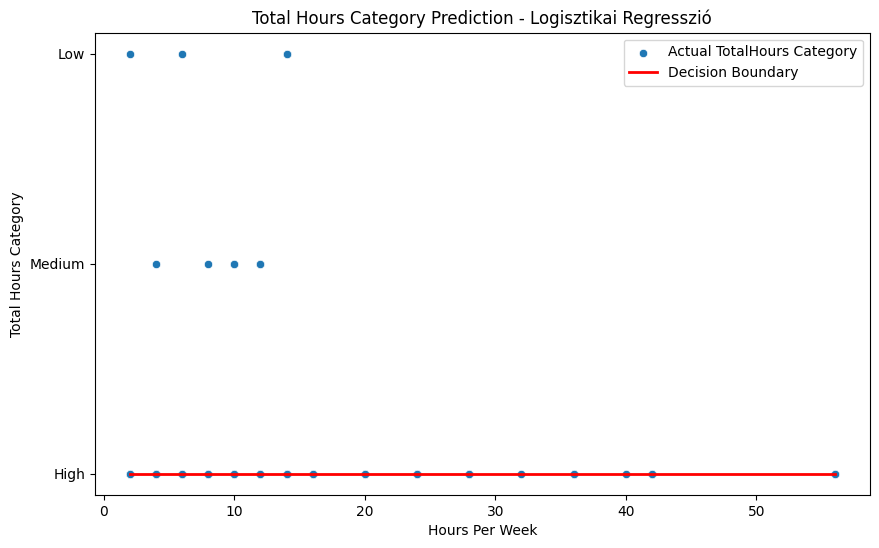

In [334]:
df_feltoltott['TotalHours_Category'] = pd.cut(df_feltoltott['TotalHours'], bins=[0, 50, 100, np.inf], labels=['Low', 'Medium', 'High'])

X = df_feltoltott[['HoursPerWeek']].to_numpy()
y = df_feltoltott['TotalHours_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual TotalHours Category',  palette='Set1')
sns.lineplot(x=X_test.flatten(), y=logreg.predict(X_test), label='Decision Boundary', color='red', linewidth=2)
plt.xlabel('Hours Per Week')
plt.ylabel('Total Hours Category')
plt.title('Total Hours Category Prediction - Logisztikai Regresszió')
plt.legend()
plt.show()

### C/2:

In [381]:
y = df_feltoltott['LeagueIndex']

X = df_feltoltott.drop('LeagueIndex', axis=1)  # LeagueIndex oszlop kivétele a jellemzők közül

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

coefficients = pd.DataFrame(logreg.coef_, columns=X.columns)
intercepts = pd.DataFrame(logreg.intercept_, columns=['Intercept'])
print("Coefficients:\n", coefficients)
print("Intercepts:\n", intercepts)


Accuracy: 0.4088888888888889
Confusion Matrix:
 [[ 2  2  2  3  0  0  0  0]
 [ 0 10  6  4  3  0  0  0]
 [ 1  1 11 11  4  0  0  0]
 [ 0  1 10 25 17  0  0  0]
 [ 0  1  3 18 22  7  0  1]
 [ 0  0  1  6 26 15  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0  7]]
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.22      0.33         9
           2       0.67      0.43      0.53        23
           3       0.33      0.39      0.36        28
           4       0.37      0.47      0.42        53
           5       0.31      0.42      0.35        52
           6       0.56      0.31      0.40        48
           7       0.00      0.00      0.00         4
           8       0.88      0.88      0.88         8

    accuracy                           0.41       225
   macro avg       0.47      0.39      0.41       225
weighted avg       0.44      0.41      0.41       225

Coefficients:
      GameID       Age  HoursPerWeek  TotalHou

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

## D) OSztályozás

### D/1: indoklás

A célváltozónk a LeagueIndex, amelyhez azokat az attribútumokat keressük, amik a legjobban korrelálnak vele. Eddig az Age és a HoursPerWeek attribútumokat vizsgáltuk, de erre a célra az APM oszlop  is alkalmas lenne. A kitűzött feladat, hogy előre tudjuk jelezni, hogy egy StarCraft játékosok egyes ligákba való besorolásuk mennyiben függ ettől a három adattól.

### D/2: Normalizálás

In [384]:
selected_features = ['Age', 'HoursPerWeek', 'APM']

X = df_feltoltott[selected_features]
y = df_feltoltott['LeagueIndex']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.04460364  3.69552509  0.71407491]
 [ 0.66820906 -0.69593277 -0.95057925]
 [-0.51981211  2.41468321  0.05991915]
 ...
 [-0.04460364 -0.32997795  2.891117  ]
 [-0.04460364 -0.32997795  4.17384384]
 [-0.04460364 -0.32997795  3.71221241]]


### D/3 Tanuló és teszthalmazra való felbontás

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (899, 3)
Test set size: (225, 3)


### D/4: Két osztályozó algoritmus kiválasztása

1. Logisztikai **regresszió**

In [386]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.3333333333333333


2. Döntési fa

In [388]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 0.25333333333333335


### D/5: Kiértékelés, különböző teljesítményérték használata

In [395]:
# 1
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# 2
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.25      0.04      0.07        23
           3       0.22      0.36      0.27        28
           4       0.34      0.57      0.42        53
           5       0.32      0.33      0.32        52
           6       0.50      0.27      0.35        48
           7       0.00      0.00      0.00         4
           8       0.57      0.50      0.53         8

    accuracy                           0.33       225
   macro avg       0.27      0.26      0.25       225
weighted avg       0.33      0.33      0.31       225

Logistic Regression Confusion Matrix:
[[ 0  2  5  2  0  0  0  0]
 [ 0  1 11  8  3  0  0  0]
 [ 0  0 10 15  3  0  0  0]
 [ 0  1 11 30 11  0  0  0]
 [ 0  0  7 21 17  6  0  1]
 [ 0  0  2 13 18 13  0  2]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  1  3  0  4]]
Decision Tree Classification Report:
              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
